# ELE 435/535 Homework 3: Gradient Descent and Neural Networks

## Part 1. Neural Networks

In this part, we will use Keras and TensorFlow to train a neural network on MNIST dataset. We will compare the neural network with a multinomial softmax regression. Write the code for training these two models.

There are two options to do this: (1) Install TensorFlow as descibed below,   
OR   
use Google's Colab. Option 2 offers the potential of faster machines and a nice jupyter notebook style API. The code and results you write and run on Colab can be downloaded as a Jupyter notebook. NOTE: the load on Colab varies over time so don't wait to the last day to use Colab.

## 1. TensorFlow Installation

TensorFlow is a free and an open source software library for numerical computation using data flow graphs. It was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research. However, it's applicable in a wide variety of other domains as well.

1. Install Anaconda by following the instructions here https://www.anaconda.com/download. This should work for all MAC, Linux and Windows operating systems.
2. Open your Anaconda terminal and create a new environment called tensorflow using the following command: <br> conda create -n tensorflow python=3.6 <br>
3. Now, activate your tensorflow environment by typing <br> source activate tensorflow (MAC and Linux) <br> activate tensorflow (Windows) <br>
4. Once the new envoironment is activated, we are going to install the following packages:<br> conda install ipython <br> conda install jupyter <br> conda install matplotlib <br> conda install -c conda-forge tensorflow 

## 2. Import keras from Tensorflow
There are many well-written tutorials on how to use TensorFlow. For example, see:  <br> https://www.datacamp.com/community/tutorials/tensorflow-tutorial <br>
Further, these days high-level APIs such as Keras has made it very easy to train very deep neural networks. For example, simply with 4-5 lines of code with Keras running on top of TensorFlow (https://www.tensorflow.org/tutorials/), you can get more than 95% test accuracy on MNIST.

In [24]:
# This code is provided
import tensorflow as tf
#print('tensorflow:', tf.__version__)

from tensorflow import keras
#print('keras: ', keras.__version__)

## 3. Load the MINST dataset from keras

In [25]:
# This code is provided
# download the data
num_train = 30000
from tensorflow.keras.datasets import mnist
(train_images_2d, train_labels), (test_images_2d, test_labels) = mnist.load_data()
train_images_2d = train_images_2d[0:num_train,:,:]
train_labels = train_labels[0:num_train]
print('Training images shape:',train_images_2d.shape)
print('Training labels shape:',train_labels.shape)
print('Testing images shape:',test_images_2d.shape)
print('Training labels shape:',test_labels.shape)

# reshape and scale the images
train_images = train_images_2d.reshape(num_train,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images_2d.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

print('Reshaped training images shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)

# process the labels to one-hot encoded form
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('One-hot encoded training labels shape:', train_labels.shape)
print('One-hot encoded testing labels shape:', test_labels.shape)

Training images shape: (30000, 28, 28)
Training labels shape: (30000,)
Testing images shape: (10000, 28, 28)
Training labels shape: (10000,)
Reshaped training images shape: (30000, 784)
Training labels shape: (30000,)
One-hot encoded training labels shape: (30000, 10)
One-hot encoded testing labels shape: (10000, 10)


## 4. Training a multinomial softmax regression using Keras/TensorFlow on MNIST
Write the code for training multinomial softmax regression using the keras API. The network is 784 (the size of the input layer) -> 10 (the size of the output layer) -> softmax (activiation function for the output layer). Then After training for 5 epochs, report the testing loss and testing accuracy.

In [26]:
#This code is given to you 

MSReg = keras.models.Sequential(name='MSReg_4_MNIST')

MSReg.add(keras.layers.Dense(10, activation='softmax', input_shape=(28*28,)))

MSReg.compile(optimizer = 'RMSprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

MSReg.summary()

Model: "MSReg_4_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [27]:
# This code is given to you
MSReg.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1)

test_loss, test_acc = MSReg.evaluate(test_images, test_labels, verbose=0)
print('test_loss', test_loss)
print('test_acc', test_acc)

Epoch 1/5
235/235 [==============================] - 1s 3ms/step - loss: 0.8260 - accuracy: 0.7996
Epoch 2/5
235/235 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8950
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3378 - accuracy: 0.9080
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3125 - accuracy: 0.9138
Epoch 5/5
235/235 [==============================] - 1s 2ms/step - loss: 0.2981 - accuracy: 0.9182
test_loss 0.2936519980430603
test_acc 0.9162999987602234


## 5. Training an multilayer perceptron (MLP) using Keras/TensorFlow on MNIST
Write the code for training an MLP using keras API. The model parameter is 784 (the size of the input layer) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 10 (the size of the output layer) -> softmax (activiation function for the output layer). Then report the testing loss and testing accuracy.

In [28]:
#This code is given to you
Uno_HL = keras.models.Sequential(name='Uno_HL_NN')
Uno_HL.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
Uno_HL.add(keras.layers.Dense(10, activation='softmax'))
Uno_HL.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

Uno_HL.summary()

Model: "Uno_HL_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               401920    
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
#This code is given to you
Uno_HL.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1)

test_loss, test_acc = Uno_HL.evaluate(test_images, test_labels, verbose=0)
print('test_loss', test_loss)
print('test_acc', test_acc)

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3422 - accuracy: 0.9026
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1504 - accuracy: 0.9558
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0972 - accuracy: 0.9709
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0695 - accuracy: 0.9795
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0507 - accuracy: 0.9851
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0365 - accuracy: 0.9895
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0276 - accuracy: 0.9927
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0203 - accuracy: 0.9948
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0148 - accuracy: 0.9964
Epoch 10/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0116 - accura

## 6. Training a convolutional neural network (CNN) using Keras/TensorFlow on MNIST
Write the code for training a CNN using keras API. The first layer is the size of 64 with the kernel size of 3 and the relu activation; the second layer is the size of 32 with the kernel size of 3 and the relu activation, followed by faltten layer and the final output layer is 10 (the size of the output layer). Then report the testing loss and testing accuracy.

In [30]:
# create model

# your code here
mynetwork = keras.models.Sequential(name='A_CovNet_4_MNIST')

mynetwork.add(
    keras.layers.Conv2D(64, (3, 3), 
    input_shape = (28, 28, 1),
    activation = 'relu',
    name = 'Convolve1')
)
# mynetwork.add(keras.layers.MaxPooling2D((2, 2), name='MP1'))

mynetwork.add(
    keras.layers.Conv2D(32, (3, 3),
    activation = 'relu',
    name = 'Convolve2')
)
# mynetwork.add(keras.layers.MaxPooling2D((2, 2), name='MP2'))

mynetwork.add(keras.layers.Flatten(name='Vectorize'))
mynetwork.add(keras.layers.Dense(10, 
                                 activation = 'softmax', 
                                 name='Mult_Regress'))

mynetwork.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

mynetwork.summary()

Model: "A_CovNet_4_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolve1 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 Convolve2 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 Vectorize (Flatten)         (None, 18432)             0         
                                                                 
 Mult_Regress (Dense)        (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [31]:
train_images_2d_reshape = train_images_2d[:,:,:,None]
test_images_2d_reshape = test_images_2d[:,:,:,None]

# Train
mynetwork.fit(train_images_2d_reshape, train_labels, epochs = 10, batch_size = 128, verbose = 1)

# Test and print results
test_loss, test_acc = mynetwork.evaluate(test_images_2d_reshape, test_labels, verbose = 0)
print('test_loss', test_loss)
print('test_acc', test_acc)


Epoch 1/10
235/235 [==============================] - 84s 354ms/step - loss: 0.9414 - accuracy: 0.9201
Epoch 2/10
235/235 [==============================] - 85s 360ms/step - loss: 0.0757 - accuracy: 0.9779
Epoch 3/10
235/235 [==============================] - 83s 354ms/step - loss: 0.0446 - accuracy: 0.9877
Epoch 4/10
235/235 [==============================] - 85s 361ms/step - loss: 0.0275 - accuracy: 0.9921
Epoch 5/10
235/235 [==============================] - 84s 358ms/step - loss: 0.0145 - accuracy: 0.9958
Epoch 6/10
235/235 [==============================] - 85s 363ms/step - loss: 0.0121 - accuracy: 0.9973
Epoch 7/10
235/235 [==============================] - 83s 351ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 8/10
235/235 [==============================] - 84s 356ms/step - loss: 0.0047 - accuracy: 0.9986
Epoch 9/10
235/235 [==============================] - 83s 352ms/step - loss: 0.0043 - accuracy: 0.9988
Epoch 10/10
235/235 [==============================] - 84s 357ms/step - l

## 6. Comparison between these three models
Which model is better? Please comment on this.

In [32]:
#The CNN model is better as it has the highest test accuracy at ~98%

## Part 2. Autoencoder
In this part, we will use Keras and TensorFlow to train an autoencoder on MNIST dataset.

## 1. Training an autoencoer (MLP) using Keras/TensorFlow on MNIST
Write the code for training an MLP using keras API. The model parameter is 784 (the size of the input layer) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 10 (the size of the middle representation) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 784 (the size of the input). 

In [33]:
# This code is given to you
AE = keras.models.Sequential(name='AE')
AE.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
AE.add(keras.layers.Dense(10, activation='relu'))
AE.add(keras.layers.Dense(512, activation='relu'))
AE.add(keras.layers.Dense(784, activation='relu'))
AE.compile(optimizer = 'rmsprop',
               loss = 'MSE')

AE.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               401920    
                                                                 
 dense_26 (Dense)            (None, 10)                5130      
                                                                 
 dense_27 (Dense)            (None, 512)               5632      
                                                                 
 dense_28 (Dense)            (None, 784)               402192    
                                                                 
Total params: 814,874
Trainable params: 814,874
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Fit the model, then report the testing loss and testing accuracy.
# Your code here
AE_train = AE.fit(train_images, train_images, epochs=10, batch_size=128,
       shuffle=True, validation_data=(test_images, test_images))

loss = AE_train.history['loss']
val_loss = AE_train.history['val_loss']
print('test_loss: ', loss)
print('test_val_loss: ', val_loss)

Epoch 1/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0476 - val_loss: 0.0374
Epoch 2/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0343 - val_loss: 0.0324
Epoch 3/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0302 - val_loss: 0.0284
Epoch 4/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0276 - val_loss: 0.0261
Epoch 5/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0259 - val_loss: 0.0266
Epoch 6/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0246 - val_loss: 0.0233
Epoch 7/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0228 - val_loss: 0.0227
Epoch 8/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0217 - val_loss: 0.0219
Epoch 9/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0211 - val_loss: 0.0209
Epoch 10/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0207 - val_lo

## 2. Plot the reconstructed images
Write the code for randomly plotting 10 image paris of the orginal and reconstrated images.

313/313 [==============================] - 1s 5ms/step


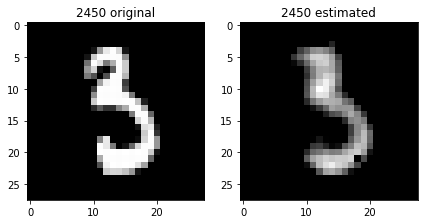

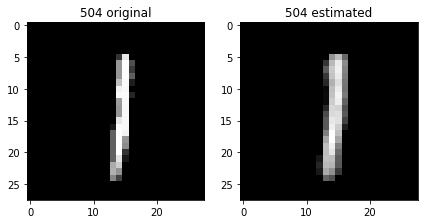

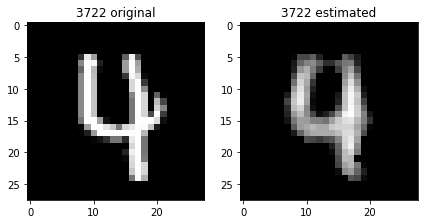

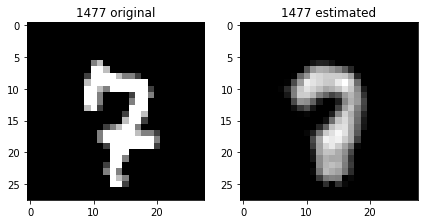

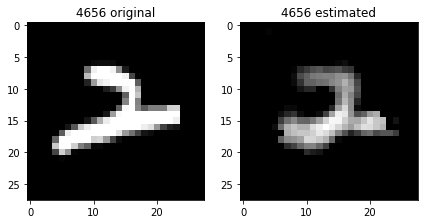

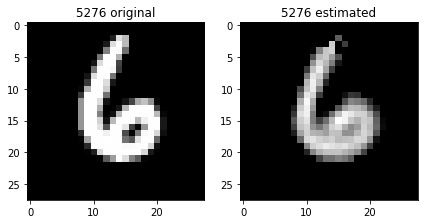

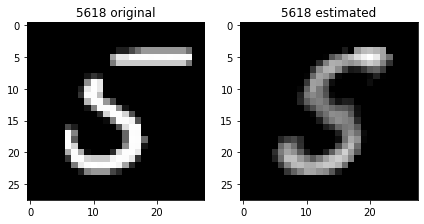

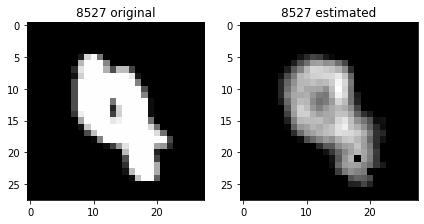

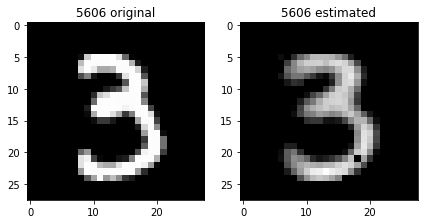

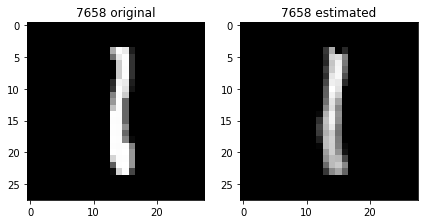

In [35]:
# Use Matplotlib
import matplotlib.pyplot as plt
import random as random

decoded_imgs = AE.predict(test_images)

for i in range(10):
  a = random.randint(0, 9999)
  # Get the first test example in each class and plot
  plt.rcParams["figure.figsize"] = (7,7)
  plt.figure()

  plt.subplot(1,2,1)
  plt.title(str(a) + ' original')
  plt.imshow(test_images[a].reshape(28,28), plt.cm.gray)

  plt.subplot(1,2,2)
  plt.title(str(a) + ' estimated')
  plt.imshow(decoded_imgs[a].reshape(28,28), plt.cm.gray)

  plt.show()

## 3. Vary the size of the middle representations.
Write the code for randomly plotting 10 image paris of the orginal and reconstrated images with the size of the middle representation being 5, 2, and 1.

Suggestion: write the model specification and the training as a function with the size of the middle layer as a parameter.

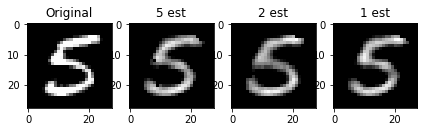

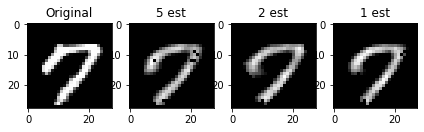

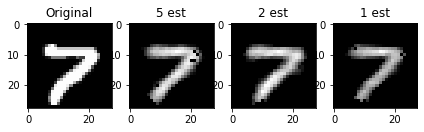

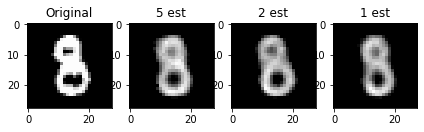

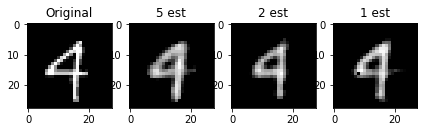

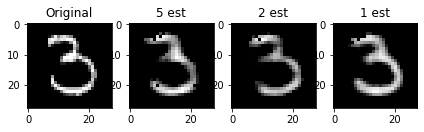

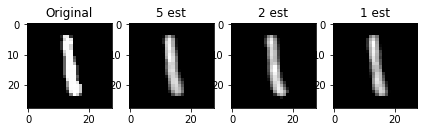

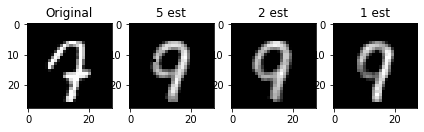

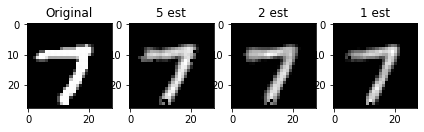

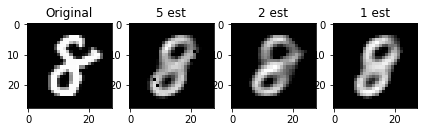

In [38]:
# Use Matplotlib
import matplotlib.pyplot as plt

def model_AE(n):
  AE = keras.models.Sequential(name='AE')
  AE.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
  AE.add(keras.layers.Dense(10, activation='relu'))
  AE.add(keras.layers.Dense(512, activation='relu'))
  AE.add(keras.layers.Dense(784, activation='relu'))
  AE.compile(optimizer = 'rmsprop',
                loss = 'MSE')
  AE.summary()
  return AE

AE5 = model_AE(5)
AE2 = model_AE(2)
AE1 = model_AE(1)

AE5_train = AE5.fit(train_images, train_images, epochs=10, batch_size=128,
       shuffle=True, validation_data=(test_images, test_images))
AE2_train = AE2.fit(train_images, train_images, epochs=10, batch_size=128,
       shuffle=True, validation_data=(test_images, test_images))
AE1_train = AE1.fit(train_images, train_images, epochs=10, batch_size=128,
       shuffle=True, validation_data=(test_images, test_images))

decoded_imgs5 = AE5.predict(test_images)
decoded_imgs2 = AE2.predict(test_images)
decoded_imgs1 = AE1.predict(test_images)

# your code here
for i in range(10):
  a = random.randint(0, 9999)
  # Get the first test example in each class and plot
  plt.rcParams["figure.figsize"] = (7,7)
  plt.figure()

  plt.subplot(1,4,1)
  plt.title('Original')
  plt.imshow(test_images[a].reshape(28,28), plt.cm.gray)

  plt.subplot(1,4,2)
  plt.title('5 est')
  plt.imshow(decoded_imgs5[a].reshape(28,28), plt.cm.gray)

  plt.subplot(1,4,3)
  plt.title('2 est')
  plt.imshow(decoded_imgs2[a].reshape(28,28), plt.cm.gray)

  plt.subplot(1,4,4)
  plt.title('1 est')
  plt.imshow(decoded_imgs1[a].reshape(28,28), plt.cm.gray)

  plt.show()


## 4. What do you observe for varying the size of representations?
Please comment on this.

In [37]:
# The as size of representations decrease, the estimated image is less accurate